### Analysing HR dataset of a company to design a model to predict employee retention and help making HR decisions

#### dataset source
https://www.kaggle.com/datasets/giripujar/hr-analytics

In [54]:
# import libraries

import pandas as pd
from matplotlib import pyplot as plt

In [55]:
df = pd.read_csv("HR_dataset.csv")

df.head(6)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [57]:
# descriptive statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [59]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df["left"] = df["left"]

numerical_df.groupby("left").mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above summary we can conclude
1. satisfaction level : low level leads to employee leaving the company
2. average monthly hours is high for employees leaving
3. promotion in last 5 years is a major factor

In [ ]:
df_salary = df.groupby(["salary", "left"]).size().unstack()
df_salary

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


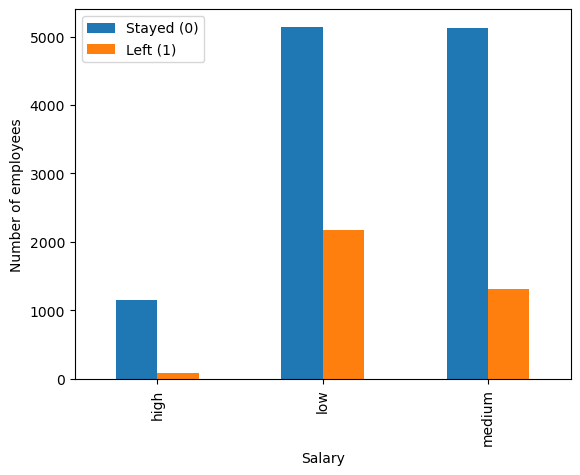

In [ ]:
df_salary.plot(kind="bar")

plt.xlabel("Salary")
plt.ylabel("Number of employees")
plt.legend(["Stayed (0)", "Left (1)"])

<Axes: xlabel='Department'>

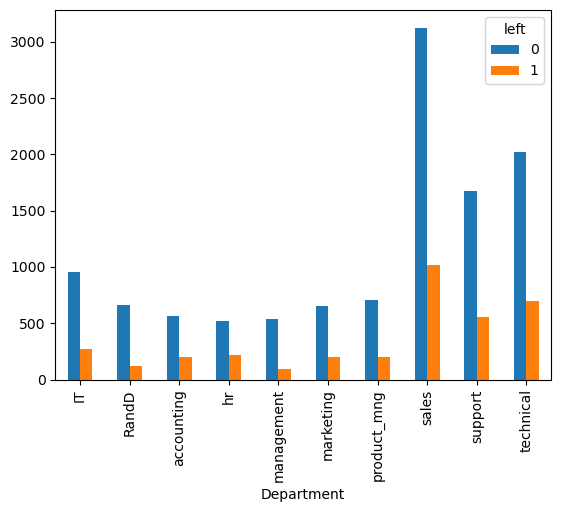

In [ ]:
# department wise graph
df_department = df.groupby(["Department", "left"]).size().unstack()

df_department.plot(kind="bar")

Based on above analysis we can conclude following set of features for our model
1. Satisfaction level
2. Average Monthly Hours
3. Promotion in last 5 years
4. Salary

In [65]:
dataset = df[['satisfaction_level',
              'average_montly_hours', 'promotion_last_5years', 'salary']]

dataset.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [70]:
salary_dummies = pd.get_dummies(dataset.salary, prefix="salary")
df_with_dummies = pd.concat([dataset, salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [71]:
df_with_dummies.drop('salary', axis='columns', inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [72]:
X = df_with_dummies
X.head()

y = df.left

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.3)

In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [75]:
model.fit(X_train, y_train)

/opt/anaconda3/envs/dsai/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], shape=(10500,))

In [77]:
model.score(X_test, y_test)

0.7797142857142857

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
2906,0.53,167,0,False,True,False
14511,0.45,151,0,False,False,True
2598,0.50,150,0,False,False,True
11312,0.80,161,0,False,True,False
7101,0.58,268,0,False,False,True
...,...,...,...,...,...,...
10009,0.71,137,0,False,False,True
8755,0.95,224,0,False,False,True
14926,0.85,245,0,False,True,False
1220,0.36,137,0,False,True,False
